2023-02-21 15:25:57.539116: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-21 15:25:57.539659: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Epoch 1/5


2023-02-21 15:25:58.332404: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-21 15:25:58.806162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2037 - accuracy: 0.9423

2023-02-21 15:26:08.536355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 11s 21ms/step - loss: 0.2037 - accuracy: 0.9423 - val_loss: 0.0825 - val_accuracy: 0.9733
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0559 - accuracy: 0.9829 - val_loss: 0.0410 - val_accuracy: 0.9865
Epoch 3/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0462 - val_accuracy: 0.9842
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0327 - val_accuracy: 0.9894
Epoch 5/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0305 - val_accuracy: 0.9891


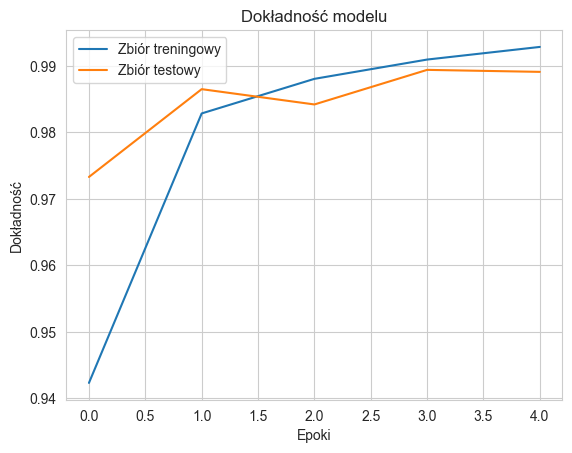

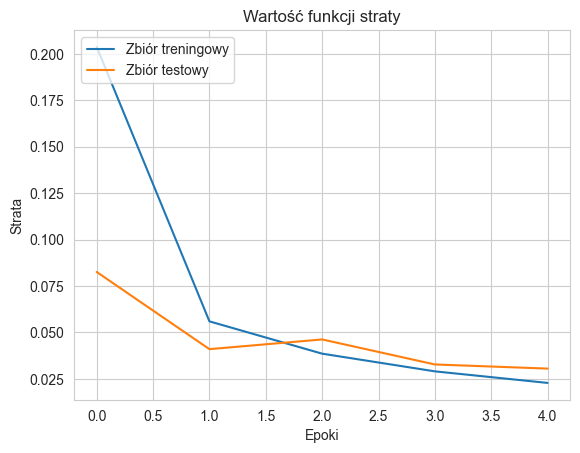

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=128, epochs=5, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Dokładność modelu')
plt.ylabel('Dokładność')
plt.xlabel('Epoki')
plt.legend(['Zbiór treningowy', 'Zbiór testowy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Wartość funkcji straty')
plt.ylabel('Strata')
plt.xlabel('Epoki')
plt.legend(['Zbiór treningowy', 'Zbiór testowy'], loc='upper left')
plt.show()
